## Introduction

When starting this project, my initial data source was the UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators). 
Following the instructions for loading the data, everything proceeded smoothly as I began describing each column in the data frame. However, I would that the information provided for the Age variable was not as detailed as I preferred.

I then followed a link to what was described as the original dataset website, leading me to a dataset on Kaggle (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). 

On this page, I discovered that this dataset had been a cleaned and consolidated version from another source. This lead me to yet another Kaggle dataset page (https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system). 
This page provided a link to the CDC's Behavioral Risk Factor Surveillance System data page annual survey data (https://www.cdc.gov/brfss/annual_data/annual_data.htm).

Upon reaching the primary data source, I located data from the 2023 BRFSS Survey (https://www.cdc.gov/brfss/annual_data/annual_2023.html) and then downloaded the data in .XPT format.

This page also contained, which will allow me to identify the relevant columns and features to use for this project.

In [28]:
# Importing pandas library.
import pandas as pd

# Reading in the .xpt survey file, creating a copy of said file, and printing the first 5 rows of said copy.
df = pd.read_sas('LLCP2023.xpt', format='xport')
df1 = df.copy()
df1.head()

MemoryError: Unable to allocate 1.11 GiB for an array with shape (345, 433323) and data type float64

### Column/Feature Descriptions

* *GENHLTH* -> 1 represents general health is excellent, 2 represents that general health is very good, 3 represents that general health is good, 4 represents that general health is fair, and 5 represents that general health is poor.

* *PHYSHLTH* -> Can take on a range of 1-30, where the value represents how many of the past 30 days was the individual's physical health not good. 88 for some reason represents that they had no days with bad health, but I will transform that to be zero because it doesn't make sense.

* *MENTHLTH* -> Can take on a range of 1-30, where the value represents how many of the past 30 days was the individual's mental health not good. 88 also represents that the individual didn't have a day with bad mental health.

* *_HLTHPL1* -> 1 represents that the individual has some form of insurance while 2 indicates that the individual doesn't have some form of health insurance. 

* *_TOTINDA* -> 1 represents that the individual had physical activity or exercise in the past 30 days other than their regular job while 0 indicates that the individual didn't have any exercise or physical activity in the past 30 days other than their job.

* *_PA150R4* -> 1 indicates that the individual participated in 150+ minutes (vigorous equivalent minutes) of physical activity per week, 2 indicates that the individual participated in 1-149 minutes (or vigorous equivalent minutes) of physical activity per week, and 3 indicates 0 minutes (or vigorous equivalent minutes) of physical activity per week. 

* *_PASTRNG* -> 1 indicates that the individual does meet muscle strengthening recommendations while 2 indicates that the individual doesn't meet muscle strengthening recommendations.

* *_RFHYPE6* -> 1 indicates that the individual hasn't been told they have high blood pressure by a health professional while 2 indicates that the individual has been told they have high blood pressure by a health professional.

* *_RFCHOL3* -> 1 indicates that the individual hasn't been told by a health professional that their cholesterol is high while 2 indicates that the individual has been told by a health professional that their cholesterol is high.

* *_MICHD* -> 1 indicates that the individual has reported having coronary heart disease or a myocardial infarction while 2 indicates that the individual has not reported having coronary heart disease or a myocardial infarction.

* *_LTASTH1* -> 1 indicates that the individual has not been told that they have asthma while 2 indicates that the individual has been told that they have asthma. 

* *_DRDXAR2* -> 1 indicates that the individual have had been diagnosed with some form of arthritis while 2 indicates that the individual hasn't been diagnosed with arthritis.

* *_SEX* -> 1 indicates that the individual is male while 2 indicates that the individual is female.
 
* *_AGE80* -> Values from 18-99 that represent each individual's age.

* *HTIN4* -> Represents the individual's height in inches (36-95).

* *_BMI5* -> Represents the individual's Body Mass Index (with two implied decimal places, 1850 corresponds to 18.5)

* *_EDUCAG* -> 1 represents that the individual didn't graduate High School, 2 represents the individual did graduate High School, 3 indicates that the individual attended College or Technical School, and 4 represents that the individual graduated from College or Technical School.

* *_INCOMG1* -> 1 indicates an total household income of less than $15000, 2 indicates an total household income greater than $15000 but less than $25000, 3 indicates a total household income greater than $25000 but less than $35000, 4 indicates a total household income greater than $35000 but less than $50000, 5 indicates a total household income greater than $50000 but less than $100000, 6 indicates a total household income greater than $100000 but less than $200000, and 7 represents a total household income greater than $200000.

* *_SMOKER3* -> 1 indicates that the individual is a current smoker and smokes everyday, 2 indicates that the individual is a current smoker and smokes some days, 3 indicates that the individual is a former smoker, and 4 indicates that the individual has never smoked.

* *DRNKANY6* -> 1 indicates that the individual has had at least one drink of alcohol in the past 30 days while 2 indicates that the individual hasn't had at least 1 drink of alcohol in the past 30 days.

* *_RFBING6* -> 1 indicates that the individual isn't a binge drinker while 2 indicates that the individual is a binge drinker. Binge drinking is 5 or more drinks for men and 4 or more drinks for women on one occasion.

* *_RFDRHV8* -> 1 indicates that the individual isn't a heavy drinker while 2 indicates that the individual is a heavy drinker.

* *DIABETE4* -> 1 indicates that the individual is diabetic, 3 indicates the individual isn't diabetic, and 4 indicates that the individual is pre-diabetic.

* *DIFFWALK* -> 1 indicates that the individual has serious difficulty walking or climbing stairs while 2 indicates that the individual doesn't have difficulty walking or climbing stairs.

In [ ]:
# Selecting desired columns from the original dataset.
calc_v = df1[['GENHLTH','PHYSHLTH','MENTHLTH','_HLTHPL1', '_TOTINDA', '_PA150R4', '_PASTRNG', '_RFHYPE6', '_RFCHOL3',
              '_MICHD', '_LTASTH1', '_DRDXAR2', '_SEX', '_AGE80', 'HTIN4', '_BMI5', '_EDUCAG', '_INCOMG1', '_SMOKER3', 
              'DRNKANY6', '_RFBING6', '_RFDRHV8', 'DIABETE4', 'DIFFWALK'
]]

In [ ]:
# Importing the numpy library
import numpy as np

In [ ]:
# Viewing the number of rows and columns in the dataset.
calc_v.shape

(433323, 24)

The current dataset has 433,323 rows with 25 columns. 

Since there are certain values that are in the calc_v dataset that wouldn't be desired, it would be helpful to filter through each column to verify that only certain values are possible in each column. 

In [ ]:
# Filtering through each column with only desired columns.
calc_v = calc_v.loc[
    ((calc_v['GENHLTH'] >= 1) & (calc_v['GENHLTH'] <= 5)) &
    ((calc_v['PHYSHLTH'] <= 30) | (calc_v['PHYSHLTH'] == 88)) &
    ((calc_v['MENTHLTH'] <= 30) | (calc_v['MENTHLTH'] == 88)) &
    (calc_v['_HLTHPL1'].isin([1, 2])) &
    (calc_v['_TOTINDA'].isin([1, 2])) &
    (calc_v['_PA150R4'].isin([1, 2, 3])) &
    (calc_v['_PASTRNG'].isin([1, 2])) &
    (calc_v['_RFHYPE6'].isin([1, 2])) &
    (calc_v['_RFCHOL3'].isin([1, 2])) &
    (calc_v['_MICHD'].isin([1, 2])) &
    (calc_v['_LTASTH1'].isin([1, 2])) &
    (calc_v['_DRDXAR2'].isin([1, 2])) &
    (calc_v['_SEX'].isin([1, 2])) &
    (calc_v['HTIN4'].isin(np.arange(36, 96))) &
    (calc_v['_BMI5'].isin(np.arange(1, 9999))) &
    (calc_v['_EDUCAG'].isin([1, 2, 3, 4])) &
    (calc_v['_INCOMG1'].isin([1, 2, 3, 4, 5, 6, 7])) &
    (calc_v['_SMOKER3'].isin([1, 2, 3, 4])) &
    (calc_v['DRNKANY6'].isin([1, 2])) &
    (calc_v['_RFBING6'].isin([1, 2])) &
    (calc_v['_RFDRHV8'].isin([1, 2])) &
    (calc_v['DIABETE4'].isin([1, 3, 4])) &
    (calc_v['DIFFWALK'].isin([1, 2]))
]


In [ ]:
# Viewing the number of rows and column in the dataset.
calc_v.shape

(223492, 24)

After filtering through each column, we can see that there are row 223,492 rows and 25 columns. As a disclaimer, some may think that too many observations from the original dataset have been removed. While I acknowledge that this isn't desired, it also wasn't desirable for me to deal with columns where certain values represented individuals not knowing the answer to the question. 

In [ ]:
# Printing the each counts of each distinct value.
print(calc_v['DIABETE4'].value_counts())

# Printing the proportion of each value.
calc_v['DIABETE4'].value_counts() / calc_v.shape[0]

DIABETE4
3.0    185473
1.0     32508
4.0      5511
Name: count, dtype: int64


DIABETE4
3.0    0.829887
1.0    0.145455
4.0    0.024659
Name: count, dtype: float64

Currently, about 83% of individuals in the dataset are classified as non-diabetic (3.0), 14.5% as diabetic (1.0), and 2.4% as pre-diabetic (4.0). Given these options, we can consider the following approaches:

1. Predicting whether individuals are diabetic or non-diabetic.
2. Predicting whether individuals are pre-diabetic or non-diabetic.
3. Predicting whether individuals are diabetic, pre-diabetic, or non-diabetic.
4. Predicting whether individuals are diabetic, pre-diabetic, or non-diabetic.

The first approach I ruled out was #4. While interesting, this would require a multi-class classification model, and my goal is to focus on a binary classification task for this project.

The next option I eliminated was #3. Grouping diabetic and pre-diabetic individuals together could be problematic because significant differences likely exist between these groups.

That leaves one other approach to consider. Initially, I intended to pursue option #2, but I realized it would result in a severe class imbalance between pre-diabetic and non-diabetic individuals.

Therefore, I will develop a model to classify individuals as either diabetic or non-diabetic. Although this still involves a class imbalance between diabetic and non-diabetic groups, it is less severe than that in approach #2.

In [ ]:
# Filtering through to only contain diabetic or non-diabetic individuals.
calc_v = calc_v.loc[calc_v['DIABETE4'].isin([1,3])]

In [ ]:
# Viewing dataset information related to size and column information.
calc_v.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217981 entries, 4 to 433320
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   217981 non-null  float64
 1   PHYSHLTH  217981 non-null  float64
 2   MENTHLTH  217981 non-null  float64
 3   _HLTHPL1  217981 non-null  float64
 4   _TOTINDA  217981 non-null  float64
 5   _PA150R4  217981 non-null  float64
 6   _PASTRNG  217981 non-null  float64
 7   _RFHYPE6  217981 non-null  float64
 8   _RFCHOL3  217981 non-null  float64
 9   _MICHD    217981 non-null  float64
 10  _LTASTH1  217981 non-null  float64
 11  _DRDXAR2  217981 non-null  float64
 12  _SEX      217981 non-null  float64
 13  _AGE80    217981 non-null  float64
 14  HTIN4     217981 non-null  float64
 15  _BMI5     217981 non-null  float64
 16  _EDUCAG   217981 non-null  float64
 17  _INCOMG1  217981 non-null  float64
 18  _SMOKER3  217981 non-null  float64
 19  DRNKANY6  217981 non-null  float64
 20  _RFBING6 

All columns/features are being treated as float numerical variables.

Before starting the exploratory analysis, I will make sure that all the columns are formatted properly.

In [ ]:
# Changing certain values for each specified column.
calc_v.loc[calc_v['PHYSHLTH'] == 88, 'PHYSHLTH'] = 0
calc_v.loc[calc_v['MENTHLTH'] == 88, 'MENTHLTH'] = 0
calc_v['_BMI5'] = calc_v['_BMI5'] / 100

# EDA (Exploratory Data Analysis)

The final step is to separate the variables into discrete and continuous categories. While both types are numeric, discrete variables represent categorical values and typically have a limited range of possible values. For example, the GENHLTH variable represents a person's general health and only takes on whole numbers from 1 to 5. In contrast, the _BMI5 variable has a wider range of values, making it a continuous variable.

Another common distinction between continuous and discrete variables is that continuous variables represent values that are measurements, while discrete variables represent values that can be counted.

In [ ]:
# Viewing all the columns in the calc_v dataset.
calc_v.columns

Index(['GENHLTH', 'PHYSHLTH', 'MENTHLTH', '_HLTHPL1', '_TOTINDA', '_PA150R4',
       '_PASTRNG', '_RFHYPE6', '_RFCHOL3', '_MICHD', '_LTASTH1', '_DRDXAR2',
       '_SEX', '_AGE80', 'HTIN4', '_BMI5', '_EDUCAG', '_INCOMG1', '_SMOKER3',
       'DRNKANY6', '_RFBING6', '_RFDRHV8', 'DIABETE4', 'DIFFWALK'],
      dtype='object')

In [ ]:
# Renaming columns for readability
calc_v = calc_v.rename(columns={
    'GENHLTH': 'general_health',
    'PHYSHLTH': 'physical_health_days',
    'MENTHLTH': 'mental_health_days',
    '_HLTHPL1': 'has_health_plan',
    '_TOTINDA': 'meets_aerobic_guidelines',
    '_PA150R4': 'physical_activity_150min',
    '_PASTRNG': 'muscle_strengthening',
    '_RFHYPE6': 'high_blood_pressure',
    '_RFCHOL3': 'high_cholesterol',
    '_MICHD': 'heart_disease',
    '_LTASTH1': 'lifetime_asthma',
    '_DRDXAR2': 'arthritis',
    '_SEX': 'sex',
    '_AGE80': 'age',
    'HTIN4': 'height_inches',
    '_BMI5': 'bmi',
    '_EDUCAG': 'education_level',
    '_INCOMG1': 'income_group',
    '_SMOKER3': 'smoking_status',
    'DRNKANY6': 'alcohol_consumption',
    '_RFBING6': 'binge_drinking',
    '_RFDRHV8': 'heavy_drinking',
    'DIABETE4': 'diabetes_status',
    'DIFFWALK': 'difficulty_walking'
})

In [ ]:
# Viewing all the column names in the calc_v dataset.
calc_v.columns

Index(['general_health', 'physical_health_days', 'mental_health_days',
       'has_health_plan', 'meets_aerobic_guidelines',
       'physical_activity_150min', 'muscle_strengthening',
       'high_blood_pressure', 'high_cholesterol', 'heart_disease',
       'lifetime_asthma', 'arthritis', 'sex', 'age', 'height_inches', 'bmi',
       'education_level', 'income_group', 'smoking_status',
       'alcohol_consumption', 'binge_drinking', 'heavy_drinking',
       'diabetes_status', 'difficulty_walking'],
      dtype='object')

In [ ]:
# Creating lists to hold the names of continuous and discrete variables.
cont_v = [ 'age', 'height_inches', 'bmi']
disc_v = ['general_health', 'has_health_plan', 'meets_aerobic_guidelines',
          'physical_activity_150min', 'muscle_strengthening',
          'high_blood_pressure', 'high_cholesterol', 'heart_disease',
          'lifetime_asthma', 'arthritis', 'sex',
          'education_level', 'income_group', 'smoking_status',
          'alcohol_consumption', 'binge_drinking', 'heavy_drinking',
          'difficulty_walking', 'physical_health_days', 'mental_health_days',]

## Continuous variable analysis

### Descriptive Statistical Measures

In [ ]:
# Printing the summary statistics for each of the continuous variables
calc_v[cont_v].describe().round(2)

,age,height_inches,bmi
count,217981.00,217981.00,217981.00
mean,57.06,67.28,28.65
std,16.49,4.14,6.42
min,18.00,36.00,12.02
25%,44.00,64.00,24.33
50%,60.00,67.00,27.46
75%,71.00,70.00,31.75
max,80.00,95.00,99.82


While the mean age of an individual is 57.06 years, its median is 60 years. This would indicate that the age variable is negatively skewed.

For the height and bmi variables, both means are greater compared to their medians respectively, indicating that both these variables are positively skewed.

### Histograms

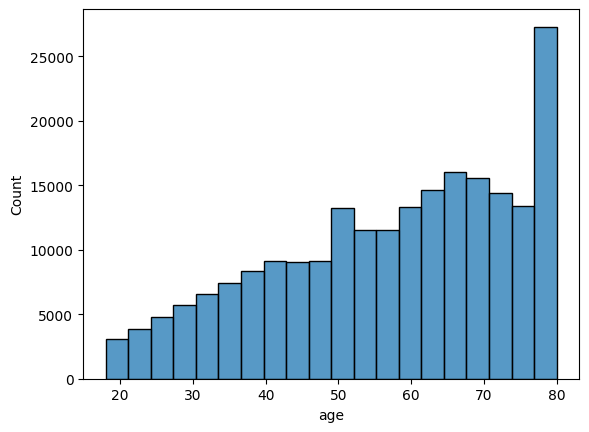

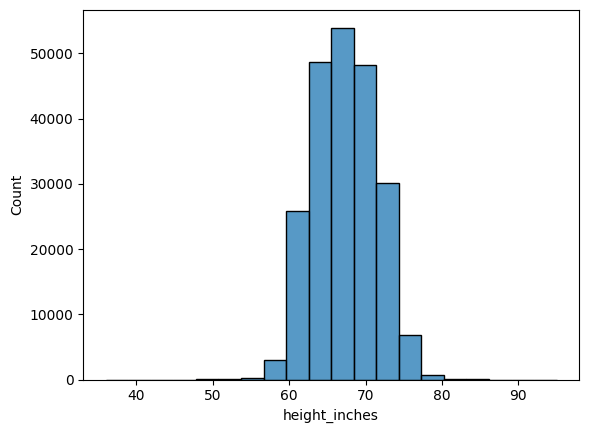

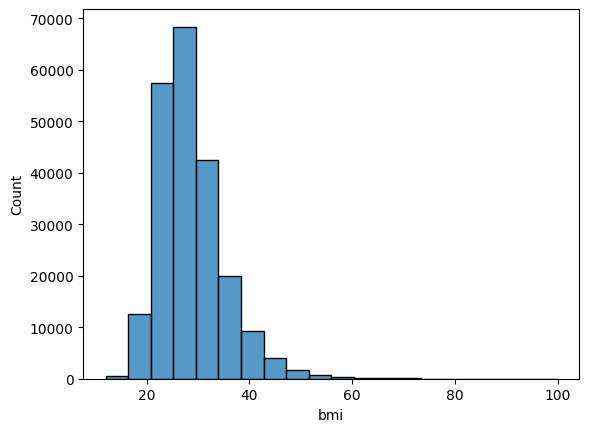

In [ ]:
# Importing data visualization libraries/functions.
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a histogram for each of the continuous variables.
for i in cont_v:
    sns.histplot(calc_v[i], bins=20)
    plt.show()

As expected, the histogram for the age variable confirms a negative skew, with a higher representation of older individuals in the dataset. Similarly, the histogram for the bmi variable shows positive skewness, indicating a greater representation of individuals with lower BMI values.

The histogram for the height is less clear in terms of skewness compared to the other two continuous variables. It doesn’t appear to follow a normal distribution either, as most individuals' heights are clustered between 57 and 80 inches.

### Boxplots

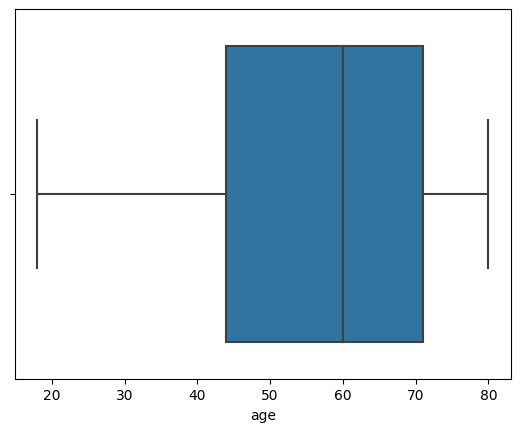

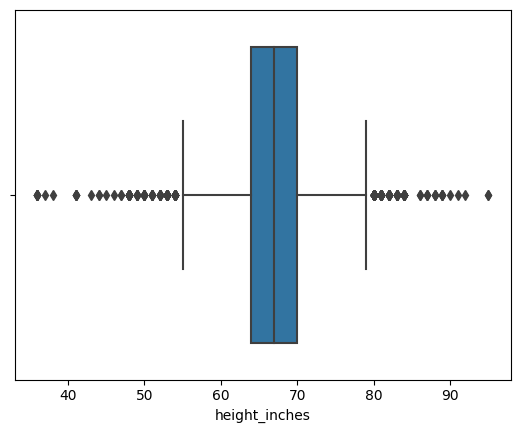

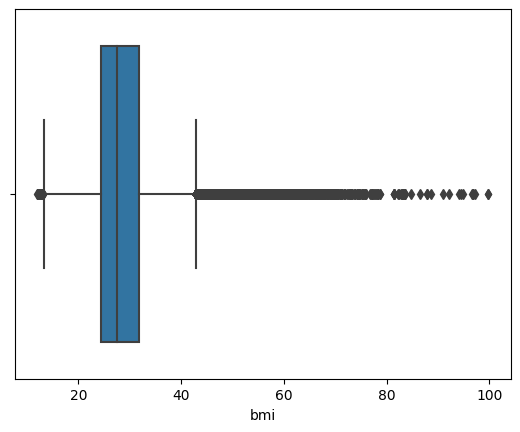

In [ ]:
# Plotting each continuous variable as a boxplot.
for i in cont_v:
    sns.boxplot(x=calc_v[i])
    plt.show()

The boxplots' showcase similar information from the histograms as the clear negative and positive skewness from the age and bmi is visible, and a fairly centered HTIN4 variable.

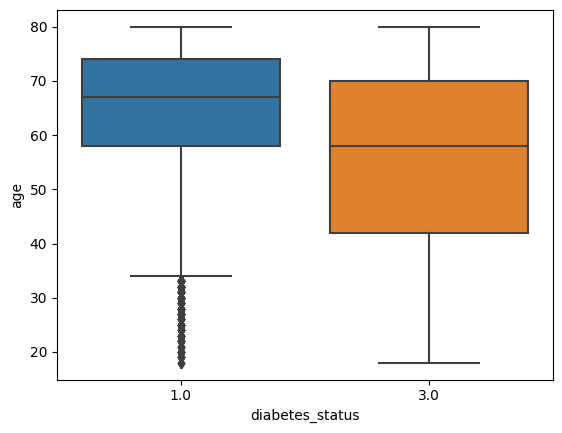

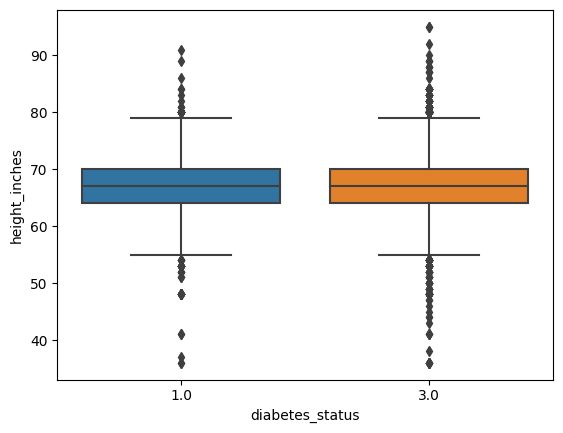

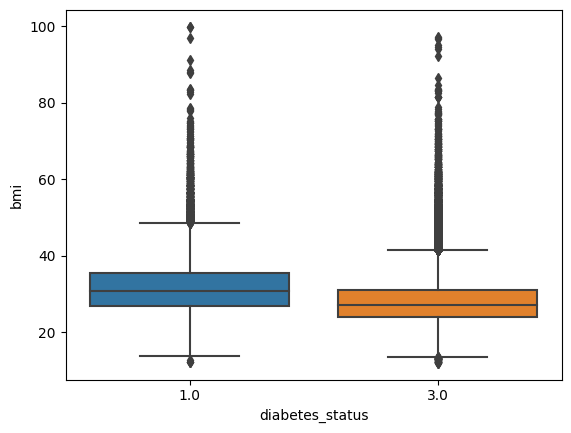

In [ ]:
# Plotting each continuous variable as a boxplot along with including the target variable to determine any possible associations.
for i in cont_v:
    sns.boxplot(data=calc_v, x='diabetes_status', y=i)
    plt.show()

In the box plots, the blue (1) boxplot on the left represents diabetic individuals, while the orange (3) boxplot on the right represents non-diabetic individuals. Although there is overlap in all plots, the HTIN4 variable does not show any clear indication that taller individuals are more or less likely to be diabetic. It’s worth noting that these observations are based solely on visual information from the plots, as no statistical tests have been performed. For the _AGE80 variable, there seems to be a trend where older individuals are more likely to be diabetic.
For the _BMI5 variable, there is a slight trend suggesting that individuals with a higher BMI might be more likely to be diabetic, though the difference is subtle.

### Correlations

In [ ]:
# Creating a correlation matrix between the 3 continuous variables.
cont_v_corr = calc_v[cont_v].corr()
cont_v_corr

,age,height_inches,bmi
age,1.000000,-0.102825,-0.043428
height_inches,-0.102825,1.000000,-0.016428
bmi,-0.043428,-0.016428,1.000000


From the above output, there does not seem to be any strong correlations between age, height, and bmi in this dataset. With all three correlations being weak and negative, this suggests that these variables have little to no impact on each other. This is useful for our model, as we can treat each variable as largely independent of the others.

### Scatter matrix

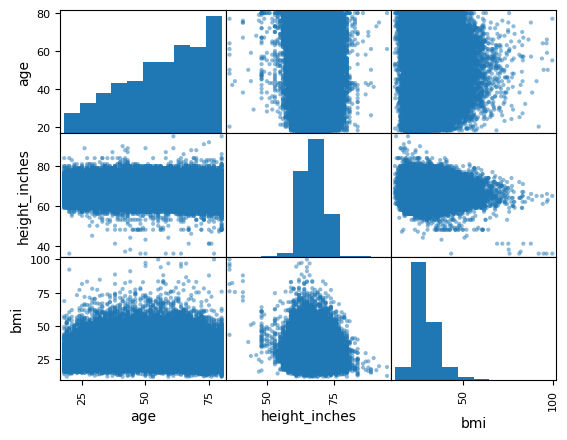

In [ ]:
# Plotting the continuous variables in a scatter_matrix.
from pandas.plotting import scatter_matrix
scatter_matrix(calc_v[cont_v])
plt.show()

Since the correlation above primarily captures linear relationships, there could potentially be strong non-linear relationships that aren't apparent. After creating scatterplots between each of the continuous variables, there do not appear to be any strong linear or non-linear relationships.

## Discrete Variable Analysis

In [ ]:
# Creating a dataset that will contain how many different value each discrete variable contains.
disc_type = pd.DataFrame(columns=['column','values'])
for i in disc_v:
    length = len(calc_v[i].value_counts())
    disc_type.loc[len(disc_type.index)] = [i, length]

# Sorting the disc_type dataset by the values columns.
disc_type.sort_values(by='values')

,column,values
9,arthritis,2
1,has_health_plan,2
2,meets_aerobic_guidelines,2
4,muscle_strengthening,2
5,high_blood_pressure,2
6,high_cholesterol,2
7,heart_disease,2
8,lifetime_asthma,2
17,difficulty_walking,2
10,sex,2


#### Binary Variable Analysis

While our binary variables can remain in their current form, they would require a one-hot encoding transformation. Without this, our model would interpret values of 2 as greater than values of 1, which isn't appropriate. For instance, with the sex variable, this approach would imply that females are "greater" than males, rather than representing two distinct categories. By converting the value of 2 to 0, the model would then interpret values as indicating either male or not male (female).

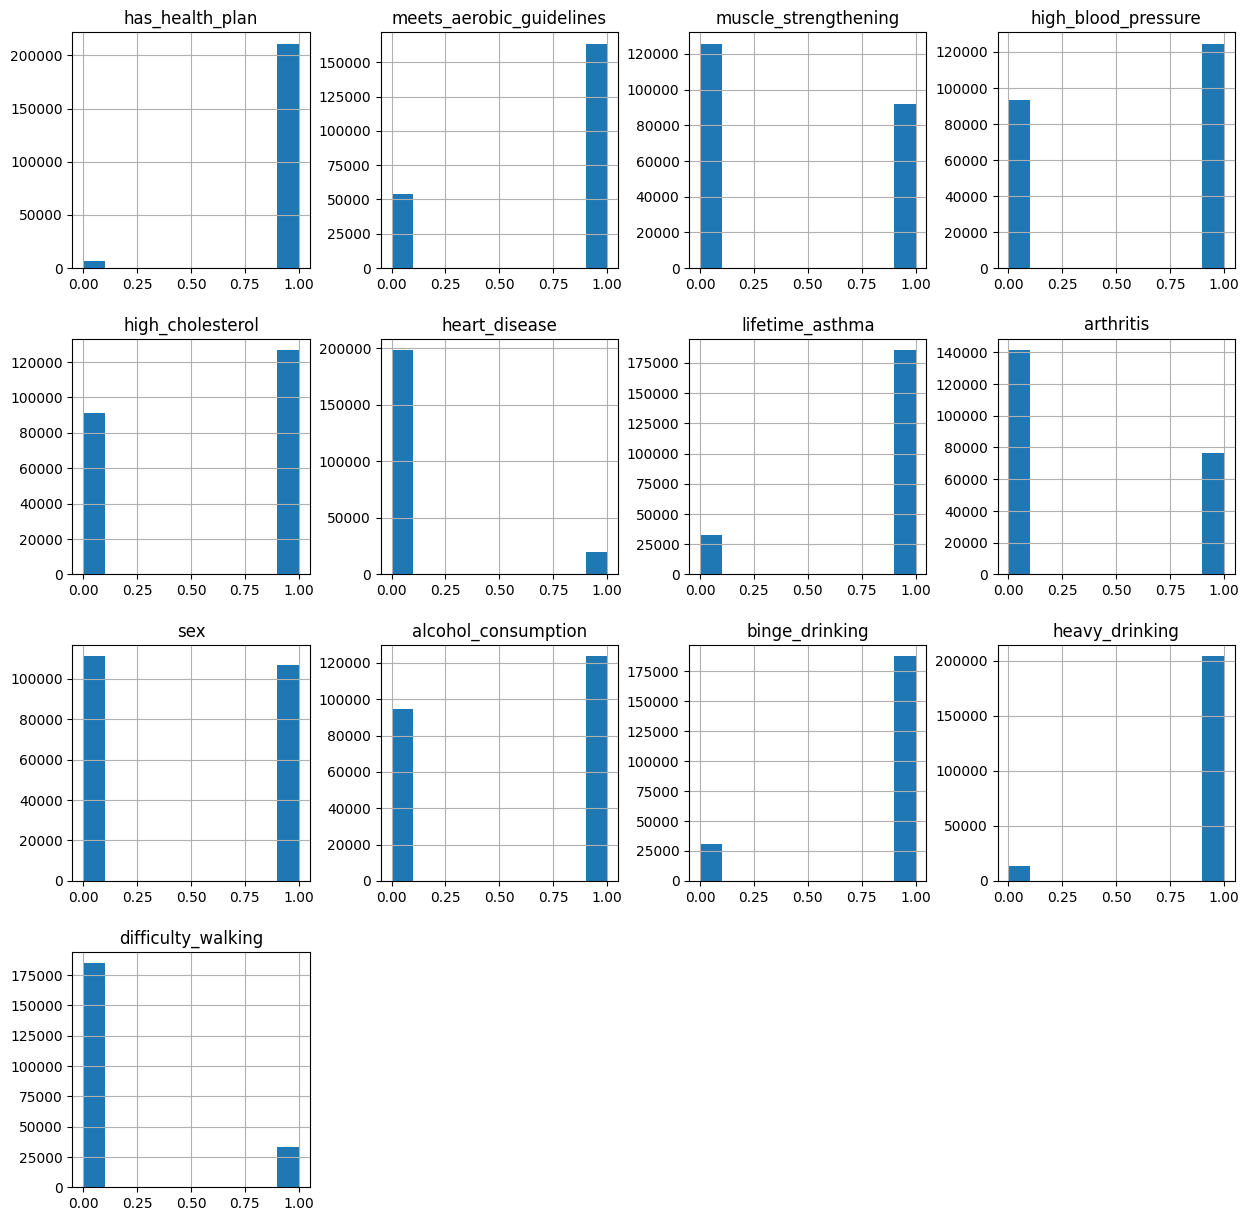

In [ ]:
# Selecting all binary variables form the disc_type dataset.
binary = disc_type.loc[disc_type['values'] == 2]
cols = binary['column'].values.tolist()

# By changing values of 2 to 0, we can leave these variables as is and not have to one-hot encode them.
calc_v[cols] = calc_v[cols].replace(2, 0)

# Plotting each binary variable from the calc_v dataset.
calc_v[cols].hist(figsize=(15,15))
plt.show()

While these graphs are histograms, they serve a similar purpose as bar charts in showing categorical distributions. From the histograms, we can observe several trends:

* Insurance: Most individuals have some form of insurance.
* Physical Activity: A majority engaged in physical exercise outside of their job in the past 30 days, but most do not meet muscle-strengthening recommendations.
* Health Indicators: Most individuals haven’t been told they have high blood pressure or high cholesterol, and the majority don’t have coronary heart disease or asthma.
* Arthritis and Difficulty Walking: Most individuals haven’t been told they have arthritis and report no difficulty walking or climbing stairs.
* Gender: There may be slightly more females than males in the dataset.
* Alcohol Consumption: Most individuals had at least one drink in the past 30 days, and most individuals are neither binge nor heavy drinkers.

#### Multi-class Variable Analysis

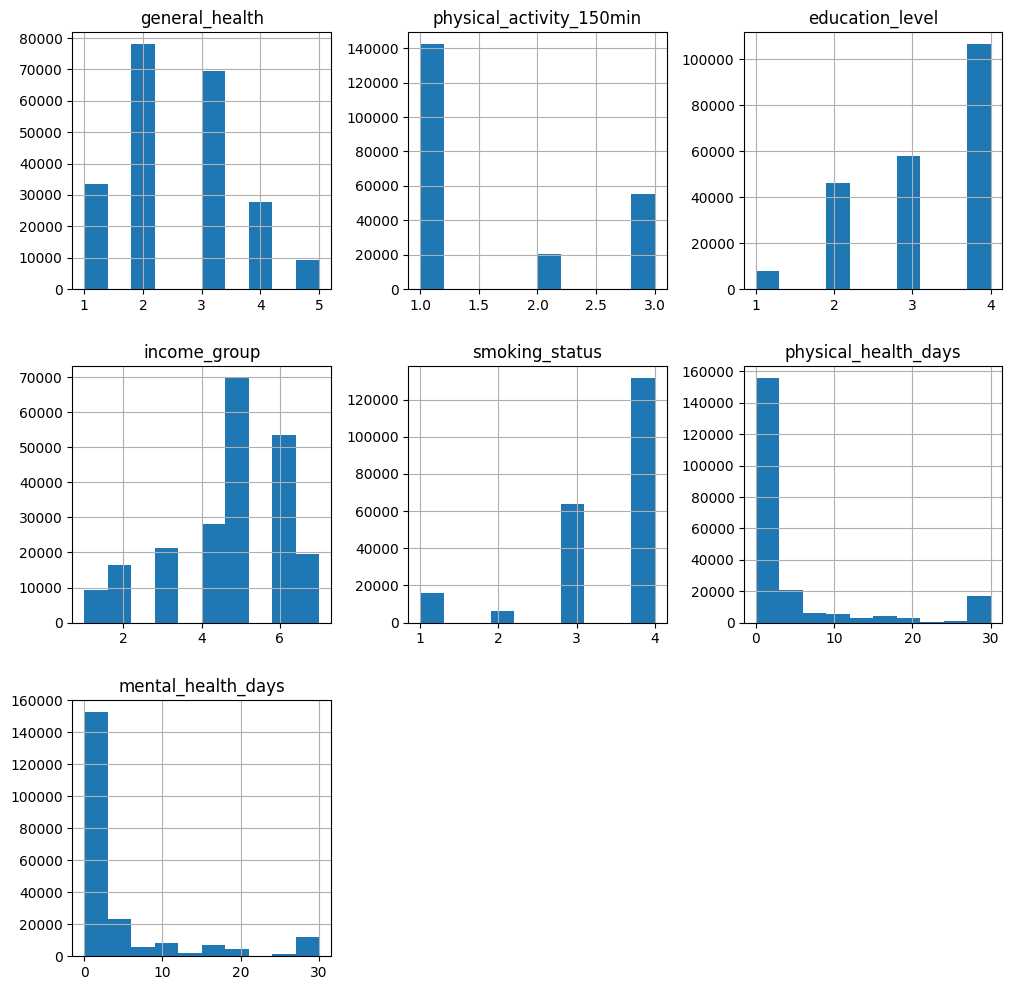

In [ ]:
# Selecting all the values that are multi-class from the disc_type dataset.
multi_class = disc_type.loc[disc_type['values'] > 2]

# Plotting histograms for each of the multi-class columns.
calc_v[multi_class['column'].values.tolist()].hist(figsize=(12,12))
plt.show()    

Most individuals in this dataset report very good general health, engage in 150+ minutes of physical exercise per week, have graduated from college or technical school, have an annual income between $50,000 and $100,000, have never smoked, and have very few days in the past 30 where their physical or mental health was poor.

Additionally, since each of the multi-class variables does have an inherent order, we don't have to transform them in any way.

#### Target Variable Analysis

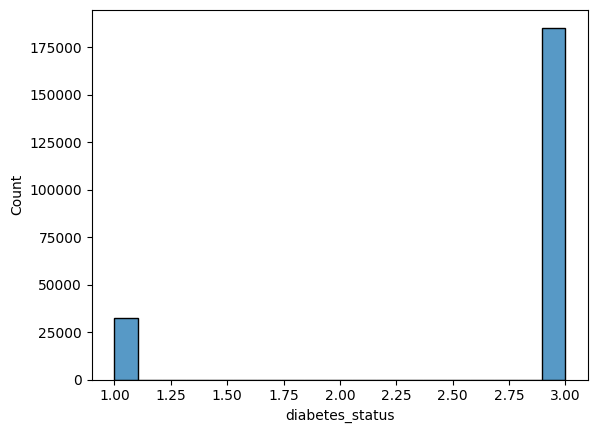

In [ ]:
# Plotting a histogram of the target variables
sns.histplot(calc_v['diabetes_status'])
plt.show()

There are significantly more non-diabetic individuals than diabetic individuals in this dataset, creating an imbalance between the two classes. This imbalance will need to be addressed during model building to ensure accurate and fair predictions across both groups.

# Conclusion

While a more thorough exploratory data analysis could have been performed, my focus is on learning and experimenting with various machine learning models. With tasks like splitting the data into training and testing sets, transforming predictive variables, and addressing class imbalance, there’s a lot to look forward to in this project!

In [ ]:
# Saving and exporting csv files.
calc_v.to_csv('df.csv')